# Gradient-descent nhiều biến
$$\theta_{t+1} = \theta_{t} - \eta\nabla_{\theta}f(\theta_{t})$$ <br>
Trong đó: $\theta$ là vector điểm (1 điểm dữ liệu)

# Tính bằng gradient-descent
$$\mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2$$ <br>
Đạo hàm của $\mathcal{L}$: $$\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)}$$

## Ví dụ về datasets 3 chiều

## Tính bằng gradient-descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(12)

In [2]:
X = np.random.rand(1000, 2)
y = np.dot(X, np.array([[4, 3]]).T) + 0.5*np.random.rand(1000, 1)
len(y)

1000

In [3]:
Xbar = np.hstack((np.ones((X.shape[0], 1)), X))
Xbar

array([[1.        , 0.15416284, 0.7400497 ],
       [1.        , 0.26331502, 0.53373939],
       [1.        , 0.01457496, 0.91874701],
       ...,
       [1.        , 0.19848386, 0.81257253],
       [1.        , 0.77925423, 0.27724679],
       [1.        , 0.51283164, 0.55167242]])

In [4]:
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

In [5]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

In [6]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(3, 1), cost, grad))

Checking gradient... True


In [7]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[1], [1], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[0.28329083 3.96745079 2.95439245]] ,
after 75 iterations.


## Sử dụng công thức

In [8]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w

array([[0.2474457 ],
       [4.00212262],
       [2.98747463]])

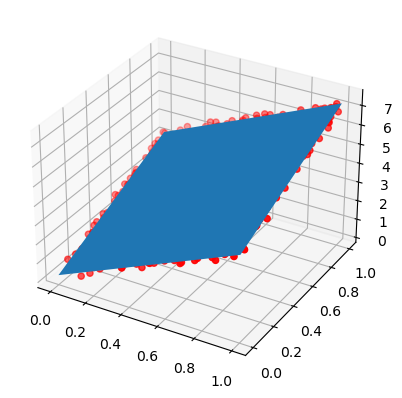

In [9]:
w_0, w_1, w_2 = w[0][0], w[1][0], w[2][0]
x_1 = np.linspace(0, 1, 2)
x_2 = np.linspace(0, 1, 2)
X_1, X_2 = np.meshgrid(x_1, x_2)
y0 = w_1 * X_1 + w_2 * X_2 + w_0
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='red')
# print(len(X[:, 0]), len(X[:, 1]), len(y))
# Vẽ mặt phẳng f(x, y)
ax.plot_surface(X_1, X_2, y0, facecolor='pink')